# SOC LEAFs Conservation Tillage
The RothC model [Colemna, Prout & Milne (2024)](https://www.rothamsted.ac.uk/sites/default/files/Documents/RothC_description.pdf) in its current state was developed to account for the effects of traditional tillage, but not of conservation tillage. [Hyun & Yoo (2024)](https://doi.org/10.1016/j.scitotenv.2023.168010) adapted the model by developing Reduced Tillage Modifier (RTMs), derived by analyzing 210 plot field studies around the globe. RTMs are an extra multiplying factor influencing the decaying/transfer rate of each SOC pool, and are dependent on initial SOC and sand content of the soil. The mean values can be summarized as:

<table border="1" cellpadding="6" cellspacing="0" style="text-align: center;">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" style="text-align: center;">Sand Content</th>
    </tr>
    <tr>
      <th></th>
      <th colspan="2" style="text-align: center;">&gt; 37.6</th>
      <th colspan="2" style="text-align: center;">&le; 37.6</th>
    </tr>
    <tr>
      <th></th>
      <th colspan="2" style="text-align: center;">SOC Content</th>
      <th colspan="2" style="text-align: center;">Sand Content</th>
    </tr>
    <tr>
      <th></th>
      <th>&gt; 75.7</th>
      <th>&le; 75.7</th>
      <th>&gt; 35</th>
      <th>&le; 36</th>
    </tr>
    <tr>
      <th>C Pool</th>
      <th style="text-align: center;">TN1</th>
      <th style="text-align: center;">TN2</th>
      <th style="text-align: center;">TN3</th>
      <th style="text-align: center;">TN3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>DPM</strong></td>
      <td>1.54</td>
      <td>1.71</td>
      <td>1.54</td>
      <td>0.72</td>
    </tr>
    <tr>
      <td><strong>RPM</strong></td>
      <td>0.35</td>
      <td>0.35</td>
      <td>2.15</td>
      <td>0.97</td>
    </tr>
    <tr>
      <td><strong>BIO</strong></td>
      <td>1.42</td>
      <td>0.38</td>
      <td>2.38</td>
      <td>0.99</td>
    </tr>
    <tr>
      <td><strong>HUM</strong></td>
      <td>0.42</td>
      <td>0.87</td>
      <td>2.93</td>
      <td>0.94</td>
    </tr>
  </tbody>
</table>


These have been implemented on the RothC model available in this repository, and can be included by simply defining the parameter `red_till = True` when running the function `rothc.run_RothC_crops`. The model, using the baseline data sourced from SoilGrids, will automatically decide which set of RTMs to apply in the calculations. 

# REMEMBER TO RE-RUN SORGHUM RAINFED RESIDUES ON/OFF SCENARIOS!

## Conservation Tillage Scenarios
SOC LEAFs have been calculated for the following crops and scenarios, and can be used to assess the local benefits of it when compared to the already calculated traditional tillage scenarios

| Crop      | Irrigation Method | Residue Management |
|:----------|:-----------------:|:------------------:|
| Barley    | Rainfed           | Removed from field |
| Barley    | Rainfed           | Left on the field |
| Barley    | Irrigated           | Removed from field |
| Barley    | Irrigated           | Removed from field |
| Cotton    | Rainfed           | Not Applicable |
| Cotton    | Irrigated           | Not Applicable  |
| Maize    | Rainfed           | Removed from field |
| Maize    | Rainfed           | Left on the field |
| Maize    | Irrigated           | Removed from field |
| Maize    | Irrigated           | Removed from field |
| Rapeseed    | Rainfed           | Removed from field |
| Rapeseed    | Rainfed           | Left on the field |
| Rapeseed    | Irrigated           | Removed from field |
| Rapeseed    | Irrigated           | Removed from field |
| Sorghum    | Rainfed           | Removed from field |
| Sorghum    | Rainfed           | Left on the field |
| Sorghum    | Irrigated           | Removed from field |
| Sorghum    | Irrigated           | Removed from field |
| Soybean    | Rainfed           | Not Applicable |
| Soybean    | Irrigated           | Not Applicable |
| Sunflower    | Rainfed           | Not Applicable |
| Sunflower    | Irrigated           | Not Applicable |
| Wheat    | Rainfed           | Removed from field |
| Wheat    | Rainfed           | Left on the field |
| Wheat    | Irrigated           | Removed from field |
| Wheat    | Irrigated           | Removed from field |

The scenarios and their parameters have been summarized in the [annual_crops_reduced_tillage_rothc_scenarios.xlsx](../data/crops/rothc_support/annual_crops_reduced_tillage_rothc_scenarios.xlsx) file.

## Running RothC

In [10]:
# Modules
import sbtn_leaf.RothC_Raster as rothc
import sbtn_leaf.map_plotting as mp
import sbtn_leaf.map_calculations as mc
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt

In [25]:
# Files
scenarios_fp = '../data/crops/rothc_support/annual_crops_reduced_tillage_rothc_scenarios.xlsx'
scenarios = pl.read_excel(scenarios_fp)
scenarios.head()

Could not determine dtype for column 11, falling back to string
Could not determine dtype for column 12, falling back to string


crop_name,commodity_type,irr_yield_scaling,practices_string_id,n_years,save_folder,data_description,lu_fp,evap_fp,pc_fp,irr_fp,pr_fp,fym_fp,red_till,save_CO2,residue_runs,spam_crop_raster,spam_all_fp,spam_irr_fp,spam_rf_fp,force_new_file
str,str,str,str,i64,str,str,str,str,str,str,str,str,bool,bool,i64,str,str,str,str,bool
"""Barley""","""annual_crop""","""irr""","""irr_ron_rt""",14,"""../LEAFs/SOC/rasters""","""RothC results for year 2030 fo…","""../data/land_use/lu_Irrigated_…","""../data/crops/rothc_support/Ba…","""../data/crops/rothc_support/Ba…","""../data/crops/rothc_support/Ba…",null,null,true,false,100,"""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…",false
"""Barley""","""annual_crop""","""irr""","""irr_roff_rt""",14,"""../LEAFs/SOC/rasters""","""RothC results for year 2030 fo…","""../data/land_use/lu_Irrigated_…","""../data/crops/rothc_support/Ba…","""../data/crops/rothc_support/Ba…","""../data/crops/rothc_support/Ba…",null,null,true,false,100,"""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…",false
"""Barley""","""annual_crop""","""rf""","""rf_ron_rt""",14,"""../LEAFs/SOC/rasters""","""RothC results for year 2030 fo…","""../data/land_use/lu_Rainfed_Ba…","""../data/crops/rothc_support/Ba…","""../data/crops/rothc_support/Ba…",null,null,null,true,false,100,"""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…",false
"""Barley""","""annual_crop""","""rf""","""rf_roff_rt""",14,"""../LEAFs/SOC/rasters""","""RothC results for year 2030 fo…","""../data/land_use/lu_Rainfed_Ba…","""../data/crops/rothc_support/Ba…","""../data/crops/rothc_support/Ba…",null,null,null,true,false,100,"""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…",false
"""Cotton""","""annual_crop""","""irr""","""irr_rt""",14,"""../LEAFs/SOC/rasters""","""RothC results for year 2030 fo…","""../data/land_use/lu_Irrigated_…","""../data/crops/rothc_support/Co…","""../data/crops/rothc_support/Co…","""../data/crops/rothc_support/Co…",null,null,true,false,100,"""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…","""../data/crops/spam2020V2r0_glo…",false


In [26]:
rothc.run_rothc_crops_scenarios_from_excel(scenarios_fp, run_test=False)

Could not determine dtype for column 11, falling back to string
Could not determine dtype for column 12, falling back to string


Running Annual crop - Barley - irr_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Barley using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Barley_irr_ron_rt_2030y_SOC.tif
Annual crop - Barley - irr_ron_rt calculated. Continuing...


Running Annual crop - Barley - irr_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Barley_irr_roff_rt_2030y_SOC.tif
Annual crop - Barley - irr_roff_rt calculated. Continuing...


Running Annual crop - Barley - rf_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Barley using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Barley_rf_ron_rt_2030y_SOC.tif
Annual crop - Barley - rf_ron_rt calculated. Continuing...


Running Annual crop - Barley - rf_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Barley_rf_roff_rt_2030y_SOC.tif
Annual crop - Barley - rf_roff_rt calculated. Continuing...


Running Annual crop - Cotton - irr_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Cotton using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Cotton_irr_rt_2030y_SOC.tif
Annual crop - Cotton - irr_rt calculated. Continuing...


Running Annual crop - Cotton - rf_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Cotton using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Cotton_rf_rt_2030y_SOC.tif
Annual crop - Cotton - rf_rt calculated. Continuing...


Running Annual crop - Maize - irr_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Maize using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Maize_irr_ron_rt_2030y_SOC.tif
Annual crop - Maize - irr_ron_rt calculated. Continuing...


Running Annual crop - Maize - irr_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Maize_irr_roff_rt_2030y_SOC.tif
Annual crop - Maize - irr_roff_rt calculated. Continuing...


Running Annual crop - Maize - rf_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Maize using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Maize_rf_ron_rt_2030y_SOC.tif
Annual crop - Maize - rf_ron_rt calculated. Continuing...


Running Annual crop - Maize - rf_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Maize_rf_roff_rt_2030y_SOC.tif
Annual crop - Maize - rf_roff_rt calculated. Continuing...


Running Annual crop - Rapeseed - irr_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Rapeseed using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Rapeseed_irr_ron_rt_2030y_SOC.tif
Annual crop - Rapeseed - irr_ron_rt calculated. Continuing...


Running Annual crop - Rapeseed - irr_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Rapeseed_irr_roff_rt_2030y_SOC.tif
Annual crop - Rapeseed - irr_roff_rt calculated. Continuing...


Running Annual crop - Rapeseed - rf_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Rapeseed using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Rapeseed_rf_ron_rt_2030y_SOC.tif
Annual crop - Rapeseed - rf_ron_rt calculated. Continuing...


Running Annual crop - Rapeseed - rf_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Rapeseed_rf_roff_rt_2030y_SOC.tif
Annual crop - Rapeseed - rf_roff_rt calculated. Continuing...


Running Annual crop - Sorghum - irr_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sorghum using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sorghum_irr_ron_rt_2030y_SOC.tif
Annual crop - Sorghum - irr_ron_rt calculated. Continuing...


Running Annual crop - Sorghum - irr_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sorghum_irr_roff_rt_2030y_SOC.tif
Annual crop - Sorghum - irr_roff_rt calculated. Continuing...


Running Annual crop - Sorghum - rf_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sorghum using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sorghum_rf_ron_rt_2030y_SOC.tif
Annual crop - Sorghum - rf_ron_rt calculated. Continuing...


Running Annual crop - Sorghum - rf_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sorghum_rf_roff_rt_2030y_SOC.tif
Annual crop - Sorghum - rf_roff_rt calculated. Continuing...


Running Annual crop - Soybean - irr_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Soybean using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Soybean_irr_rt_2030y_SOC.tif
Annual crop - Soybean - irr_rt calculated. Continuing...


Running Annual crop - Soybean - rf_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Soybean using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Soybean_rf_rt_2030y_SOC.tif
Annual crop - Soybean - rf_rt calculated. Continuing...


Running Annual crop - Sunflower - irr_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sunflower using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sunflower_irr_rt_2030y_SOC.tif
Annual crop - Sunflower - irr_rt calculated. Continuing...


Running Annual crop - Sunflower - rf_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sunflower_rf_roff_rt_2030y_SOC.tif
Annual crop - Sunflower - rf_roff_rt calculated. Continuing...


Running Annual crop - Wheat - irr_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Wheat using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Wheat_irr_ron_rt_2030y_SOC.tif
Annual crop - Wheat - irr_ron_rt calculated. Continuing...


Running Annual crop - Wheat - irr_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Wheat_irr_roff_rt_2030y_SOC.tif
Annual crop - Wheat - irr_roff_rt calculated. Continuing...


Running Annual crop - Wheat - rf_ron_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Wheat using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Wheat_rf_ron_rt_2030y_SOC.tif
Annual crop - Wheat - rf_ron_rt calculated. Continuing...


Running Annual crop - Wheat - rf_roff_rt
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Wheat_rf_roff_rt_2030y_SOC.tif
Annual crop - Wheat - rf_roff_rt calculated. Continuing...




### Checking results

In [27]:
Barley_irr_roff_rt_fp = "../LEAFs/SOC/rasters/Barley_irr_roff_rt_2030y_SOC.tif"
Barley_irr_ron_rt_fp = "../LEAFs/SOC/rasters/Barley_irr_ron_rt_2030y_SOC.tif"

Raster has 680,631 unique values. Min: 8.49. Max: 92.64
Using quantiles
All positives route (quantiles)


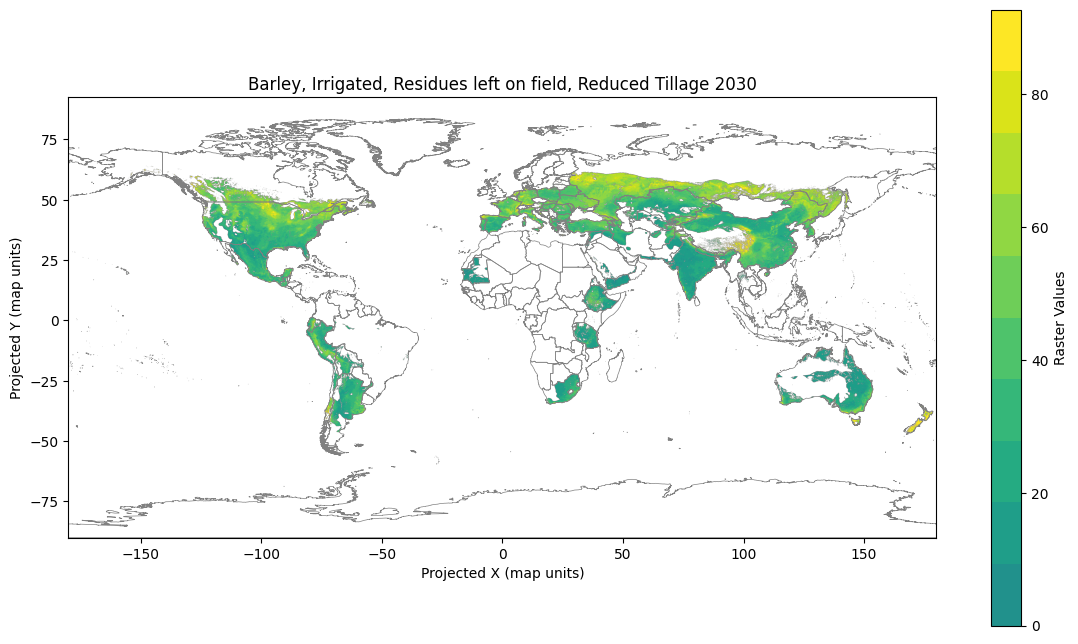

In [36]:
mp.plot_raster_on_world_extremes_cutoff(Barley_irr_ron_rt_fp, "Barley, Irrigated, Residues left on field, Reduced Tillage 2030", raster_band=15, quantiles = 10, perc_cutoff=1)

Raster has 675,136 unique values. Min: 6.19. Max: 76.26
Using quantiles
All positives route (quantiles)


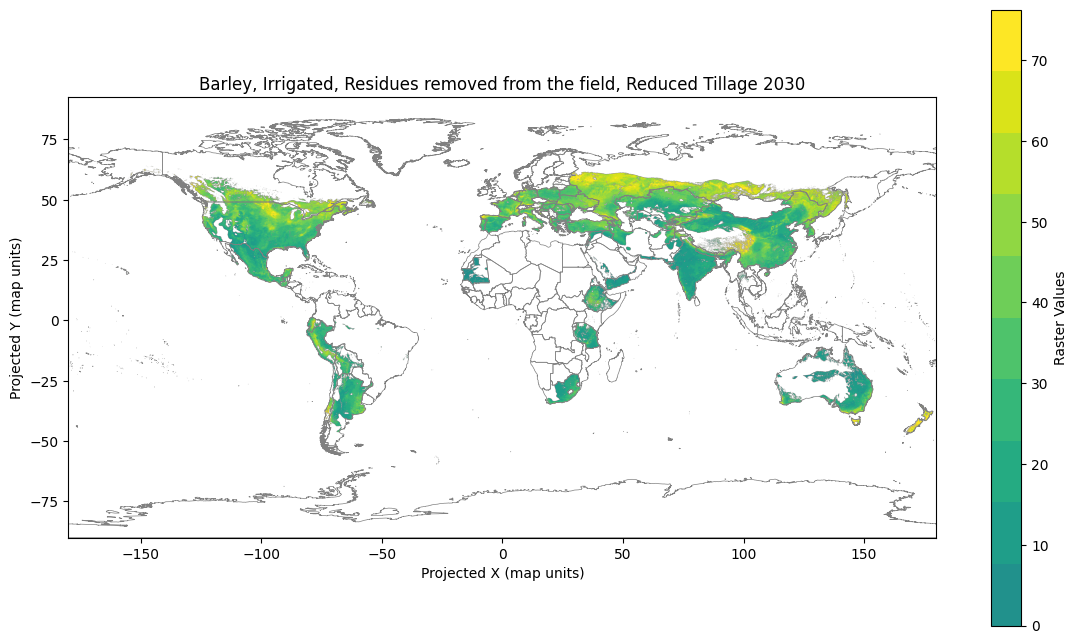

In [35]:
mp.plot_raster_on_world_extremes_cutoff(Barley_irr_roff_rt_fp, "Barley, Irrigated, Residues removed from the field, Reduced Tillage 2030", raster_band=15, quantiles = 10, perc_cutoff=1)

In [16]:
Barley_irr_roff_ct_fp = "../LEAFs/SOC/rasters/Barley_irr_roff_2030y_SOC.tif"
Barley_irr_ron_ct_fp = "../LEAFs/SOC/rasters/Barley_irr_ron_2030y_SOC.tif"

Raster has 680,356 unique values. Min: 9.39. Max: 92.94
Using quantiles
All positives route (quantiles)


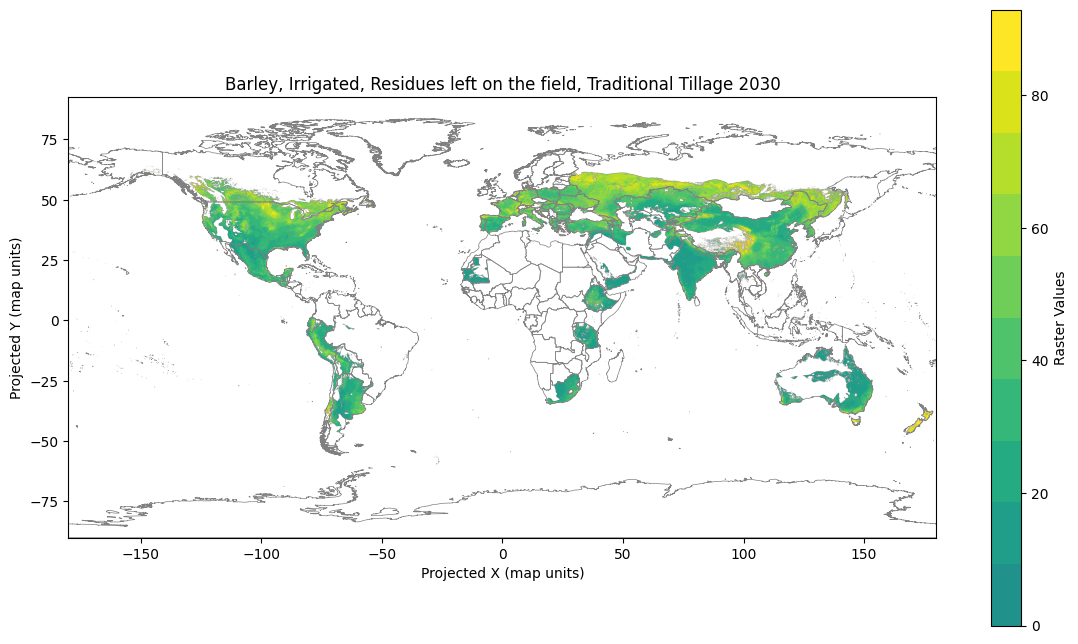

In [37]:
mp.plot_raster_on_world_extremes_cutoff(Barley_irr_ron_ct_fp, "Barley, Irrigated, Residues left on the field, Traditional Tillage 2030", raster_band=15, quantiles = 10, perc_cutoff=1)

Raster has 674,808 unique values. Min: 6.57. Max: 76.48
Using quantiles
All positives route (quantiles)


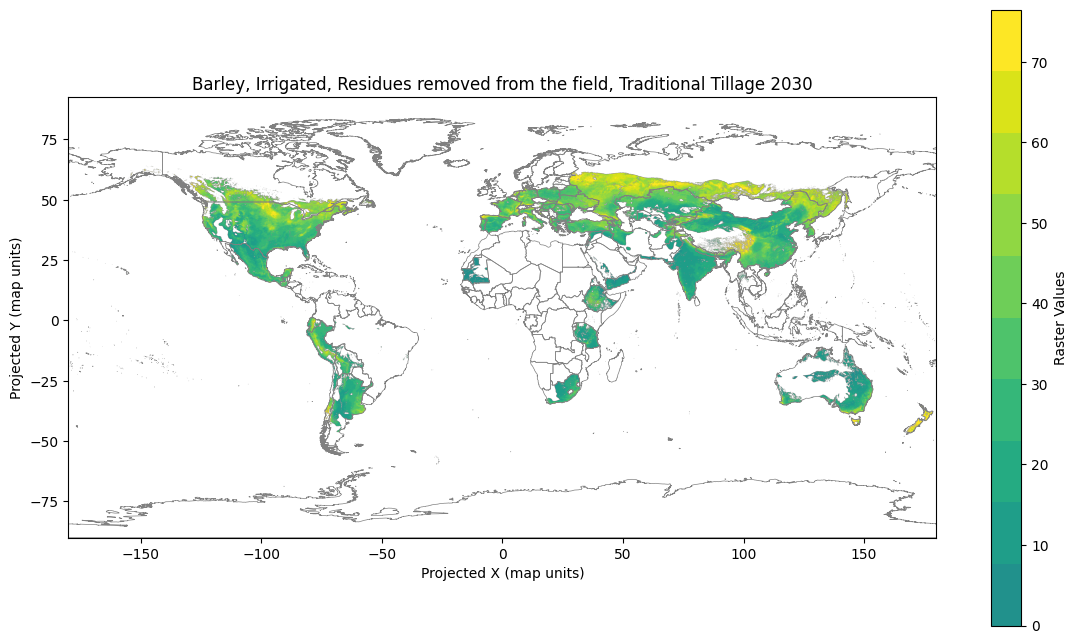

In [38]:
mp.plot_raster_on_world_extremes_cutoff(Barley_irr_roff_ct_fp, "Barley, Irrigated, Residues removed from the field, Traditional Tillage 2030", raster_band=15, quantiles = 10, perc_cutoff=1)

In [39]:
scenarios_tif = [
    Barley_irr_roff_rt_fp,
    Barley_irr_ron_rt_fp,
    Barley_irr_roff_ct_fp,
    Barley_irr_ron_ct_fp,
]
labels = [
    "Irrigated, Residues Off, Reduced Tillage",
    "Irrigated, Residues On, Reduced Tillage",
    "Irrigated, Residues Off, Conv. Tillage",
    "Irrigated, Residues On, Conv. Tillage"
]

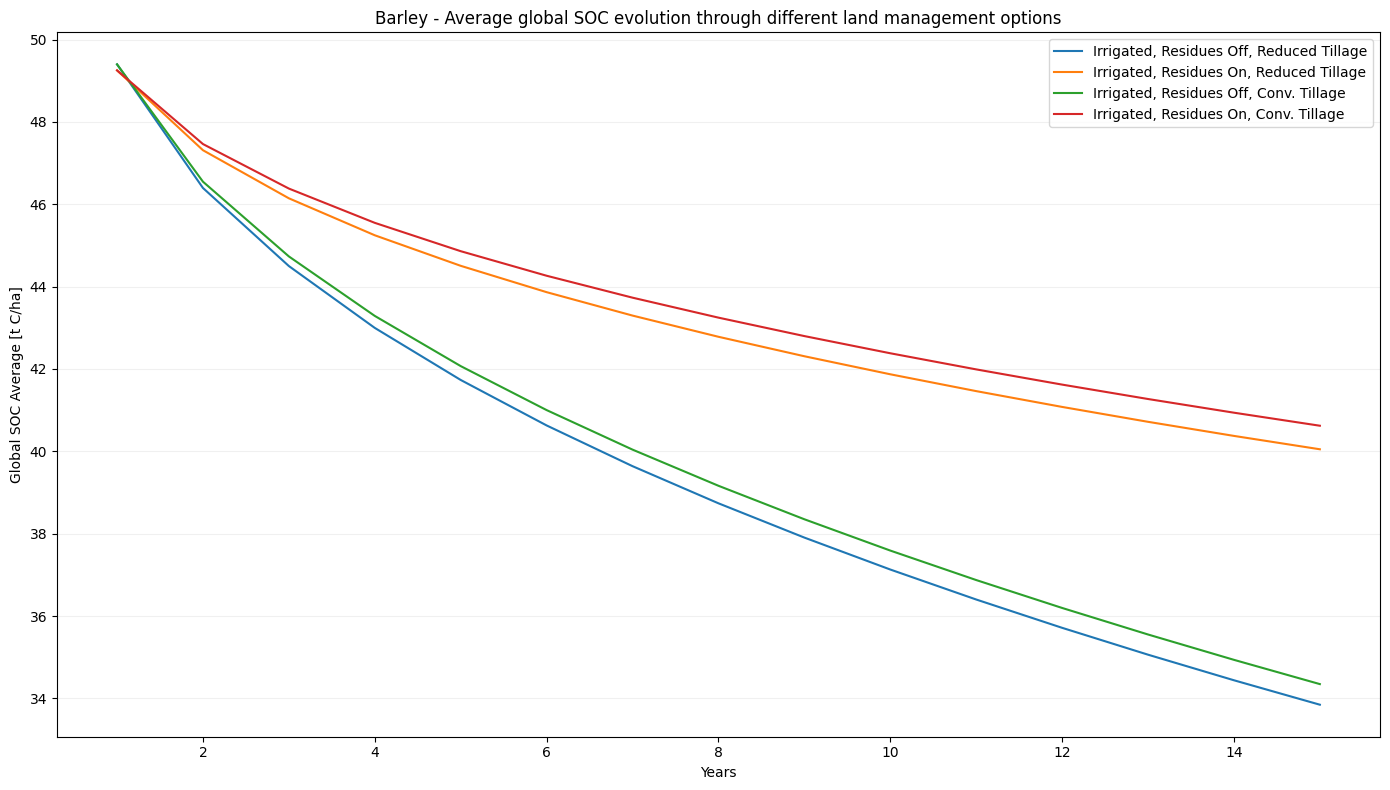

In [40]:
mp.plot_average_band_values(scenarios_tif, labels, "Barley - Average global SOC evolution through different land management options", ylabel="Global SOC Average [t C/ha]",xlabel="Years", show_iq=False)

## Calculating regional averages
Now regional averages need to be calculated, following the same procedure as done for all baseline LEAFs

### Country
Defining needed parameters

In [2]:
# Inputs that stay the same
input_folder = "../LEAFs/SOC/rasters/reducedtillage"
output_folder = "../LEAFs/SOC/"
cf_name = "SOC_2030"
cf_unit = "t C/ha"
reset_gpck = True

In [3]:
# Inputs that change by area type
area_type = "country"
layer_name = "soc_leaf_country"
corrected_shp = gpd.read_file('../data/CountryLayers/Country_Level0/g2015_2014_0_dissolved.shp')
master_key = "ADM0_NAME"
result_key = "country"
gpckg_name = "SOC_2030_reducedtillage_country"

Running country averages

In [13]:
gpkg_path, df_results = mc.build_cfs_gpkg_from_rasters(
    input_folder =input_folder,
    output_folder = output_folder,
    layer_name=layer_name,
    master_gdf=corrected_shp,           # e.g., countries, subcountries, or ecoregions
    master_key=master_key,              # 'ADM0_NAME', 'ADM1_NAME', 'ECO_NAME'
    result_key=result_key,              # must match the column emitted by your calc gdf
    input_raster_key_startswith=None,
    gpckg_name = gpckg_name,
    cf_name=cf_name,
    cf_unit=cf_unit,
    area_type=area_type,
    calc_kwargs=dict(raster_band = 15, outlier_method="log1p_win", std_thresh = 3),     # Chooses the raster band. Due to outliers in crops, setting it to windsorize, replacing all values above 3 stds with mean + 3 stds.
    reset_gpkg=reset_gpck,
    run_test=False                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results.shape[0]} rows into {gpkg_path}")

2026-01-07 12:18:45,366 - INFO - Building 'soc_leaf_country' from rasters in ../LEAFs/SOC/rasters/reducedtillage into ../LEAFs/SOC/ (../LEAFs/SOC/SOC_2030_reducedtillage_country.gpkg)



Processing rasters (soc_leaf_country):   0%|          | 0/26 [00:00<?, ?raster/s]

2026-01-07 12:18:53,779 - INFO - Calculating SOC_2030 for Barley_irr_roff_rt_2030y_SOC...
Calculating SOC_2030 for Barley_irr_roff_rt_2030y_SOC...
2026-01-07 12:21:48,833 - INFO - Calculating SOC_2030 for Barley_irr_ron_rt_2030y_SOC...
Calculating SOC_2030 for Barley_irr_ron_rt_2030y_SOC...
2026-01-07 12:24:08,511 - INFO - Calculating SOC_2030 for Barley_rf_roff_rt_2030y_SOC...
Calculating SOC_2030 for Barley_rf_roff_rt_2030y_SOC...
2026-01-07 12:26:26,780 - INFO - Calculating SOC_2030 for Barley_rf_ron_rt_2030y_SOC...
Calculating SOC_2030 for Barley_rf_ron_rt_2030y_SOC...
2026-01-07 12:28:45,453 - INFO - Calculating SOC_2030 for Cotton_irr_rt_2030y_SOC...
Calculating SOC_2030 for Cotton_irr_rt_2030y_SOC...
2026-01-07 12:30:59,316 - INFO - Calculating SOC_2030 for Cotton_rf_rt_2030y_SOC...
Calculating SOC_2030 for Cotton_rf_rt_2030y_SOC...
2026-01-07 12:33:03,919 - INFO - Calculating SOC_2030 for Maize_irr_roff_rt_2030y_SOC...
Calculating SOC_2030 for Maize_irr_roff_rt_2030y_SOC...
202

Wrote 21570 rows into ../LEAFs/SOC/SOC_2030_reducedtillage_country.gpkg


#### Checking results...

In [14]:
gdf_test_values = gpd.read_file(gpkg_path, layer=layer_name)
gdf_test_values.sort_values(by=["cf"], ascending=False).head()

,ADM0_NAME,flow_name,cf,cf_median,cf_std,_source_file
4410,United Arab Emirates,Sorghum_irr_ron_rt_2030y_SOC,174.647171,46.172329,152.778122,Sorghum_irr_ron_rt_2030y_SOC.tif
2091,Madeira Islands,Maize_irr_ron_rt_2030y_SOC,163.934555,163.046677,3.906914,Maize_irr_ron_rt_2030y_SOC.tif
6511,Madeira Islands,Wheat_irr_ron_rt_2030y_SOC,146.970383,146.547745,3.254984,Wheat_irr_ron_rt_2030y_SOC.tif
6540,New Zealand,Wheat_irr_ron_rt_2030y_SOC,128.960159,109.747398,51.171703,Wheat_irr_ron_rt_2030y_SOC.tif
2645,Madeira Islands,Maize_rf_ron_rt_2030y_SOC,127.678963,126.791092,3.906914,Maize_rf_ron_rt_2030y_SOC.tif


Merging geometries

In [15]:
gdf_test_geometries = gpd.read_file(gpkg_path, layer="geometry_layer")
gdf_test = gdf_test_geometries.merge(gdf_test_values.drop(columns="_source_file"), how="left", on="ADM0_NAME")

Plotting one crop

In [16]:
country_leafs_check = gdf_test[gdf_test["flow_name"]=="Barley_irr_ron_rt_2030y_SOC"]

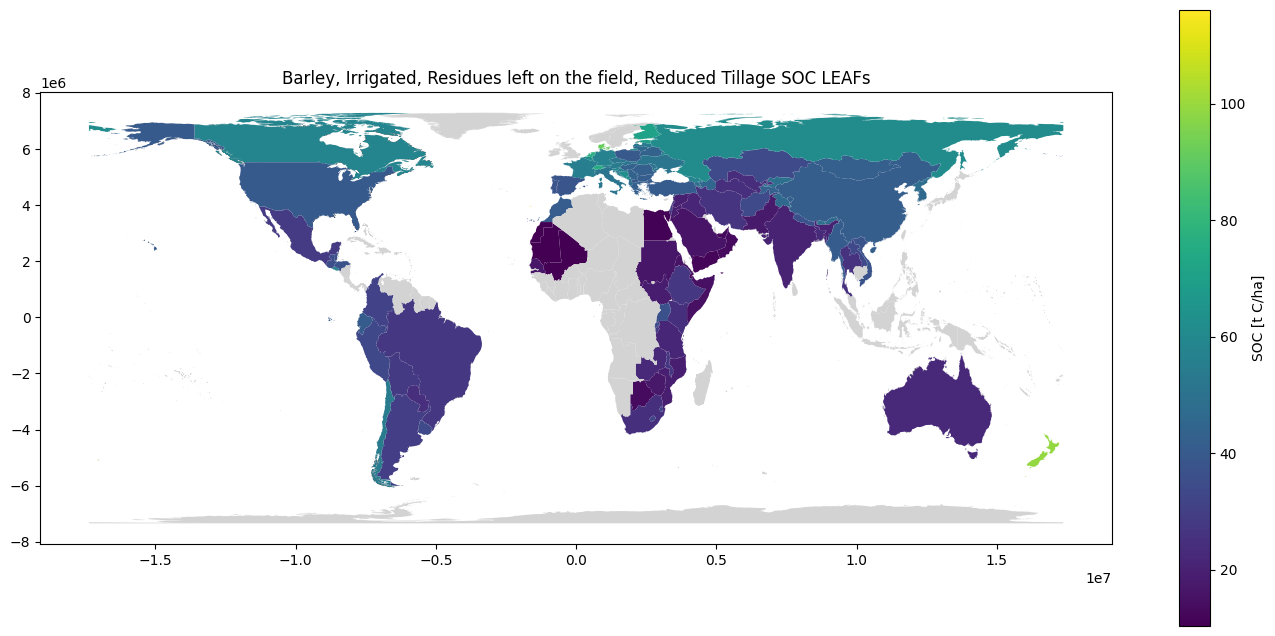

In [17]:
fig, ax = plt.subplots(figsize=(14, 8)) 
country_leafs_check.plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "SOC [t C/ha]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("Barley, Irrigated, Residues left on the field, Reduced Tillage SOC LEAFs")
plt.tight_layout() 
plt.show()

Cheching csv

In [18]:
df_results.sort_values(by="value", ascending=False).head(10)

,ADM0_NAME,country,value,metric,flow_name
12710,United Arab Emirates,United Arab Emirates,174.647170,cf_mean,Sorghum_irr_ron_rt_2030y_SOC
5969,Madeira Islands,Madeira Islands,163.934551,cf_mean,Maize_irr_ron_rt_2030y_SOC
6246,Madeira Islands,Madeira Islands,163.046677,cf_median,Maize_irr_ron_rt_2030y_SOC
13262,United Arab Emirates,United Arab Emirates,152.778118,cf_std,Sorghum_irr_ron_rt_2030y_SOC
19229,Madeira Islands,Madeira Islands,146.970381,cf_mean,Wheat_irr_ron_rt_2030y_SOC
19506,Madeira Islands,Madeira Islands,146.547745,cf_median,Wheat_irr_ron_rt_2030y_SOC
19558,Republic of Korea,Republic of Korea,130.508026,cf_median,Wheat_irr_ron_rt_2030y_SOC
19258,New Zealand,New Zealand,128.960152,cf_mean,Wheat_irr_ron_rt_2030y_SOC
7631,Madeira Islands,Madeira Islands,127.678965,cf_mean,Maize_rf_ron_rt_2030y_SOC
7908,Madeira Islands,Madeira Islands,126.791092,cf_median,Maize_rf_ron_rt_2030y_SOC


Same values as those on gpckg. All looks ok

### Subcountries
Now proceeding, same as for countries, with sub-country regions.

Loading the necessary data and parameters

In [ ]:
# Inputs that change by area type
area_type = "subcountry"
layer_name = "soc_leaf_subcountry"
corrected_shp = gpd.read_file('../data/CountryLayers/SubCountry_Level1/g2015_2014_1.shp')
master_key = "ADM1_CODE"
result_key = "ADM1_CODE"
gpckg_name = "SOC_2030_reducedtillage_subcountry"

Running the averages

In [25]:
gpkg_path, df_results = mc.build_cfs_gpkg_from_rasters(
    input_folder =input_folder,
    output_folder = output_folder,
    layer_name=layer_name,
    master_gdf=corrected_shp,           # e.g., countries, subcountries, or ecoregions
    master_key=master_key,              # or 'ISO_A3', 'ADM1_CODE', 'ECO_NAME'
    result_key=result_key,              # must match the column emitted by your calc gdf
    gpckg_name = gpckg_name,
    cf_name=cf_name,
    cf_unit=cf_unit,
    area_type=area_type,
    calc_kwargs=dict(raster_band = 15, outlier_method="log1p_win", std_thresh = 3),     # Chooses the raster band. Due to outliers in crops, setting it to windsorize, replacing all values above 3 stds with mean + 3 stds.
    reset_gpkg=True,
    run_test=False                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results.shape[0]} rows into {gpkg_path}")

2026-01-07 14:58:42,104 - INFO - Building 'soc_leaf_subcountry' from rasters in ../LEAFs/SOC/rasters/reducedtillage into ../LEAFs/SOC/ (../LEAFs/SOC/SOC_2030_reducedtillage_subcountry.gpkg)



Processing rasters (soc_leaf_subcountry):   0%|          | 0/26 [00:00<?, ?raster/s]

2026-01-07 14:59:01,800 - INFO - Calculating SOC_2030 for Barley_irr_roff_rt_2030y_SOC...
Calculating SOC_2030 for Barley_irr_roff_rt_2030y_SOC...
2026-01-07 15:15:07,716 - INFO - Calculating SOC_2030 for Barley_irr_ron_rt_2030y_SOC...
Calculating SOC_2030 for Barley_irr_ron_rt_2030y_SOC...
2026-01-07 15:35:28,484 - INFO - Calculating SOC_2030 for Barley_rf_roff_rt_2030y_SOC...
Calculating SOC_2030 for Barley_rf_roff_rt_2030y_SOC...
2026-01-07 15:52:54,595 - INFO - Calculating SOC_2030 for Barley_rf_ron_rt_2030y_SOC...
Calculating SOC_2030 for Barley_rf_ron_rt_2030y_SOC...
2026-01-07 16:10:33,166 - INFO - Calculating SOC_2030 for Cotton_irr_rt_2030y_SOC...
Calculating SOC_2030 for Cotton_irr_rt_2030y_SOC...
2026-01-07 16:27:32,064 - INFO - Calculating SOC_2030 for Cotton_rf_rt_2030y_SOC...
Calculating SOC_2030 for Cotton_rf_rt_2030y_SOC...
2026-01-07 16:45:06,195 - INFO - Calculating SOC_2030 for Maize_irr_roff_rt_2030y_SOC...
Calculating SOC_2030 for Maize_irr_roff_rt_2030y_SOC...
202

Wrote 266916 rows into ../LEAFs/SOC/SOC_2030_reducedtillage_subcountry.gpkg


#### Checking results

In [26]:
gdf_test_values = gpd.read_file(gpkg_path, layer=layer_name)
gdf_test_values.sort_values(by=["cf"], ascending=False).head()

,ADM1_CODE,flow_name,cf,cf_median,cf_std,_source_file
53522,2269,Sorghum_irr_ron_rt_2030y_SOC,341.633240,339.185394,9.030261,Sorghum_irr_ron_rt_2030y_SOC.tif
53781,3179,Sorghum_irr_ron_rt_2030y_SOC,319.808258,345.690369,81.299797,Sorghum_irr_ron_rt_2030y_SOC.tif
26160,3400,Maize_irr_ron_rt_2030y_SOC,281.869934,281.869934,0.000000,Maize_irr_ron_rt_2030y_SOC.tif
26162,3402,Maize_irr_ron_rt_2030y_SOC,280.809631,280.809631,0.000000,Maize_irr_ron_rt_2030y_SOC.tif
26380,1615,Maize_irr_ron_rt_2030y_SOC,249.798721,249.798721,0.000000,Maize_irr_ron_rt_2030y_SOC.tif


In [27]:
gdf_test_geometries = gpd.read_file(gpkg_path, layer="geometry_layer")
gdf_test = gdf_test_geometries.merge(gdf_test_values.drop(columns="_source_file"), how="left", on="ADM1_CODE")

Plotting one crop

In [28]:
subcountry_leafs_check = gdf_test[gdf_test["flow_name"]=="Barley_irr_ron_rt_2030y_SOC"]

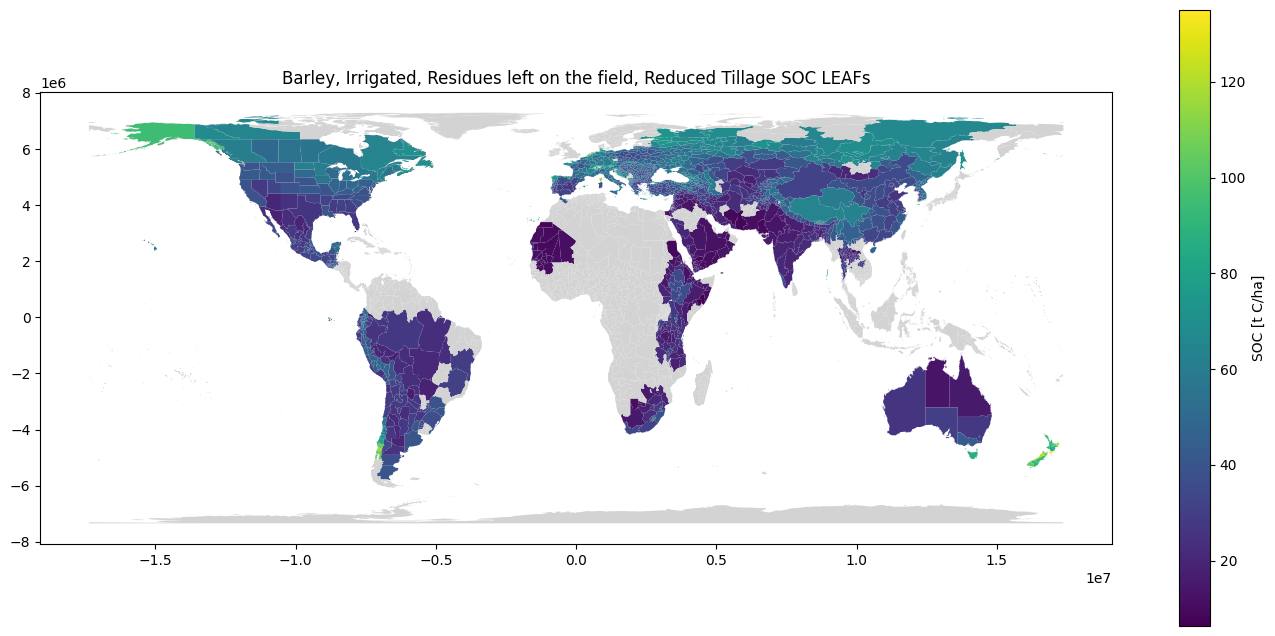

In [29]:
fig, ax = plt.subplots(figsize=(14, 8)) 
subcountry_leafs_check.plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "SOC [t C/ha]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("Barley, Irrigated, Residues left on the field, Reduced Tillage SOC LEAFs")
plt.tight_layout() 
plt.show()